In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv('data.csv', low_memory=False)
df.drop(df.columns[[0]], axis = 1, inplace=True)



In [6]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [7]:
df.shape

(18207, 88)

In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [9]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

In [10]:
df.set_index('ID', inplace=True)

cols_to_drop = [
    'Club Logo',
    'Photo',
    'Flag',
    'Loaned From',
    'Contract Valid Until',
    'Special',
    
    'LS',
    'ST',
    'RS',
    'LW',
    'LF',
    'CF',
    'RF',
    'RW',
    'LAM',
    'CAM',
    'RAM',
    'LM',
    'LCM',
    'CM',
    'RCM',
    'RM',
    'LWB',
    'LDM',
    'CDM',
    'RDM',
    'RWB',
    'LB',
    'LCB',
    'CB',
    'RCB',
    'RB'
]

df.drop(columns=cols_to_drop, inplace=True)



In [11]:
df['Age'] = df['Age'].astype(int)


In [12]:
#gk <- "GK"
#defs <- positions[str_detect(positions, "B$")]
#mids <- positions[str_detect(positions, "M$")]
#f1 <- positions[str_detect(positions, "F$")]
#f2 <- positions[str_detect(positions, "S$")]
#f3 <- positions[str_detect(positions, "T$")]
#f4 <- positions[str_detect(positions, "W$")]
#fwds <- c(f1, f2, f3, f4)

#https://www.guidetofootball.com/tactics/playing-positions
def position_to_group(col):
    if pd.isnull(col): return None
    if col == 'GK': return col
    
    defenders = {'CB', 'LB', 'RB', 'RWB', 'LWB', 'RCB', 'LCB'}
    midfielders = {'CAM', 'CM', 'CDM', 'LM', 'RM', 'RCM', 'LCM', 'LDM', 'LAM', 'RDM', 'RAM'}
    forwards = {'CF', 'RF', 'LF', 'ST', 'LW', 'RW', 'RS', 'LS'}

    if col in defenders:
        return 'DEF'  
    if col in midfielders:
        return 'MID'
    if col in forwards:
        return 'FWD'  
    
    return col + ' NOT FOUND'

    
#df['Position'].unique()
#df[df['Position'].isnull()]
df['Position Group'] = df['Position'].apply(position_to_group)
df['Position Group'].unique()

array(['FWD', 'GK', 'MID', 'DEF', None], dtype=object)

In [13]:
#fifa_data <- fifa_data %>%
#  mutate(AgeGroup = ifelse(Age <= 20, "20 and under", ifelse(Age > 20 & Age <=25, "21 to 25", ifelse(Age > 25 & Age <= 30, "25 to 30", ifelse(Age > 30 & Age <= 35, "31 to 35", "Over 35")))))

def age_to_group(col):
    if pd.isnull(col): return None
    
    if col <= 20:
        return '<= 20'  
    if col > 20 and col <= 25:
        return '21 to 25'
    if col > 25 and col <= 30:
        return '26 to 30'
    if col > 30 and col <= 35:
        return '31 to 35'
    else:
        return '> 35'

df['Age Group'] = df['Age'].apply(age_to_group)
df['Age Group'].unique()

array(['31 to 35', '26 to 30', '21 to 25', '<= 20', '> 35'], dtype=object)

In [14]:
def value_to_num(col):
    if pd.isnull(col): return 0
    
    value = col.replace('€', '').replace('M', '').replace('K', '')
    
    if col[-1] == 'M': unit = 1e6
    elif col[-1] == 'K': unit = 1e3
    else: unit = 1
    
    return int(float(value)*unit*1.11) # euro dollar rate

df['Value'] = df['Value'].apply(value_to_num)
df['Wage'] = df['Wage'].apply(value_to_num)
df['Release Clause'] = df['Release Clause'].apply(value_to_num)

In [15]:
money_format = '${:,.0f}'
df.head().style.format({'Value': money_format, 'Wage': money_format, 'Release Clause': money_format })

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,"$122,655,000","$627,150",Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",5'7,159lbs,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"$251,415,000",FWD,31 to 35
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,"$85,470,000","$449,550",Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",6'2,183lbs,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,"$141,081,000",FWD,31 to 35
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,"$131,535,000","$321,900",Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",5'9,150lbs,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,"$253,191,000",FWD,26 to 30
193080,De Gea,27,Spain,91,93,Manchester United,"$79,920,000","$288,600",Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",6'4,168lbs,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,"$153,846,000",GK,26 to 30
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,"$113,220,000","$394,050",Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",5'11,154lbs,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,"$218,004,000",MID,26 to 30


In [16]:
#https://dfrieds.com/data-visualizations/how-format-large-tick-values
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format


## Analisis de jugadores de futbol internacionales

FIFA 19 es un videojuego de simulación de fútbol desarrollado por EA Sports, como parte de la serie FIFA de Electronic Arts.
El sitio www.sofifa.com expone la información navegable de todos los jugadores del juego. Gracias a un crawler especifico (https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019) se obtuvo un dataset de 18 mil jugadores y más de 70 atributos para cada jugador.
Este dataset contiene atributos técnicos de los jugadores, tales como dribbling (regate), potencia, agresion, habilidades como arquero, etc. También incluye información personal como nacionalidad, club, edad, salario, etc.
Se efectuó un pre procesado del dataset para corregir o mejorar algunas variables/dimensiones, más adelante se comentará cual fue el pre procesado realizado.

Objetivos del presente trabajo:
* Realizacion de un analisis exploratorio detallado y encontrar insights (revelaciones).
* Mostrar que características están altamente correlacionadas con la calificación general de un jugador por posición del jugador.
* Analizar las diferencias entre la calificación actual de un jugador y su calificación potencial.
* Averiguar qué equipos tienen el mayor potencial.
* Descubrir los equipos más jóvenes y equipos más avanzados en edad.
* Utilizar clustering kmeans para encontrar 'oportunidades', alguien con las mismas habilidades/potencial pero a un precio menor.


### Preprocesado

El dataset descargado contenia algunas particularidades. La valuacion, el sueldo y la clausula de contrato  estaban formateadas con el simbolo euro (€) y con notación inglesa de millones (M) o miles (K), ejemplo €370K o €95.5M que serian respectivamente 370.000 y 95.500.000 Euros. Se aprovechó el preprocesado para pasar estos valores númericos de Euros a Dólares Estadounidenses con una relación de 1,11 Dólares por cada Euro.
El dataset, en el campo 'Position', disponía de 29 tipos de posiciones para los jugadores, se crearon 3 grupos (DEF, MID, FWD) para mejorar el análisis, mas el grupo de los arqueros (GK).
La edad también fue discretizada en 5 grupos, para poder realizar distintos análisis, se creó una variable nueva con el grupo de edad.


# Analisis exploratorio
HACER LISTADO GENERAL DE COLUMNAS

df.isnull().any()

## Calificación general (Overall)
Se puede observar que la calificación general de los jugadores tiene una distribución normal, con una media de 66.25 y un desvio de 6.90. El mínimo puntaje es 46 y lo posee 1 jugador Ingles. El valor máximo lo tienen Lionel Messi y Cristiano Ronaldo con 94.

In [17]:
df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [18]:
df[df['Overall'] == df['Overall'].min()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
246269,G. Nugent,16,England,46,66,Tranmere Rovers,66600,1110,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",5'10,176lbs,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,183150,MID,<= 20


In [19]:
df[df['Overall'] == df['Overall'].max()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,122655000,627150,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,251415000,FWD,31 to 35
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,85470000,449550,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,141081000,FWD,31 to 35


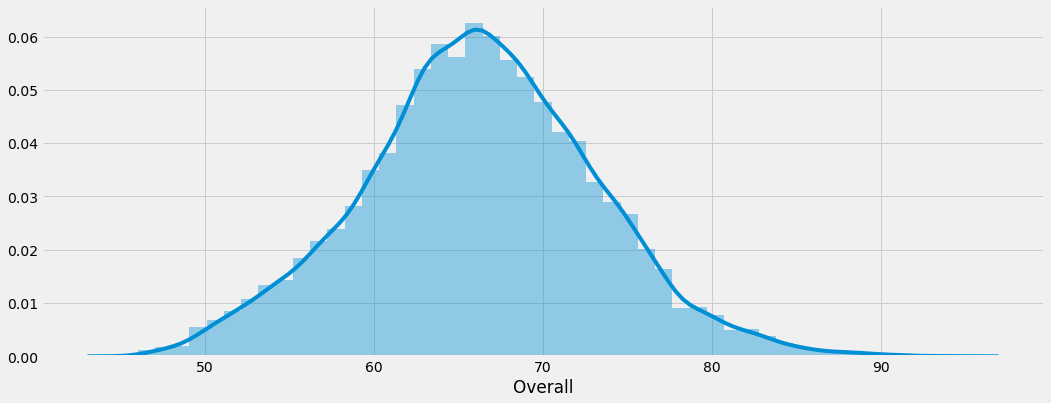

In [20]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Overall'], bins=47)

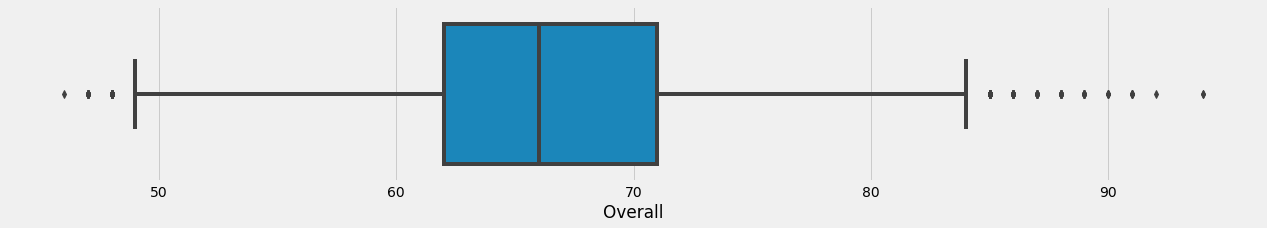

In [21]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=df['Overall'])

la calificación de los zurdos es mejor, seguir desarrollando...

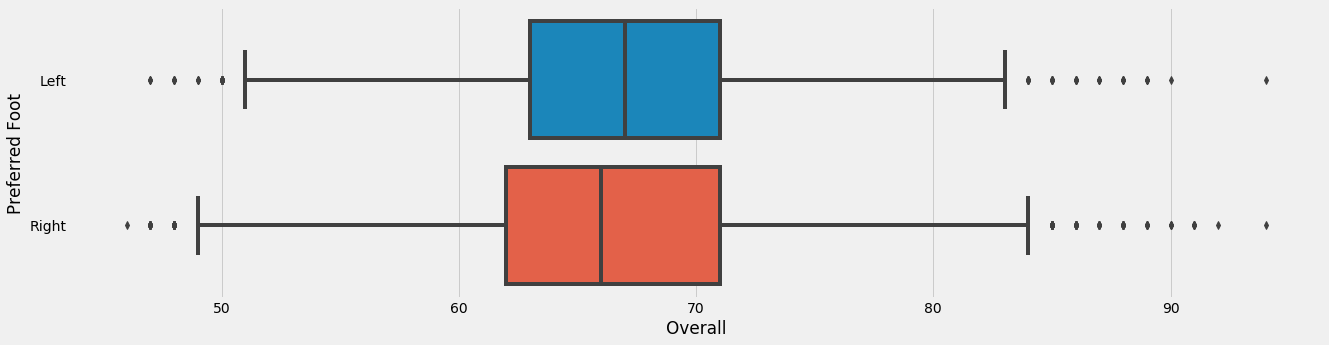

In [22]:
# overall entre zurdos y diestros
plt.figure(figsize=(20, 5))
sns.boxplot(x='Overall', y='Preferred Foot', data=df)

### Edad vs Calificación General (Overall)
En este aspecto de edad en relación a la calificación promedio para esa edad se observa lo siguiente. Cuando se trata de la calificación general de un jugador, parece como si la calificación de los jugadores estuviera creciendo hasta alrededor de los 30 años de edad, punto cúlmine de su carrera.. De los 30 a los 35, la calificacion promedio se mantiene, podriamos decir que generalmente un jugador de 30 a 35 años esta en su etapa de meseta deportiva. Luego comienzan el inevitable declive alrededor de los 35 años, pero justamente vemos en el grafico, que el intervalo de confianza (95%) a partir de los 30 comienza a ampliarse, ya que tenemos menos jugadores de esas edades y sus calificaciones son dispares. Ese pico a los 45 años se debe al Mexicano O. Perez (calificación 71), esta persona seria outlier. Luego de los 42 años inclusive, tenemos solo 3 jugadores, 42, 44 y 45 años. Es por eso que no hay intervalo de confianza para esas edades.

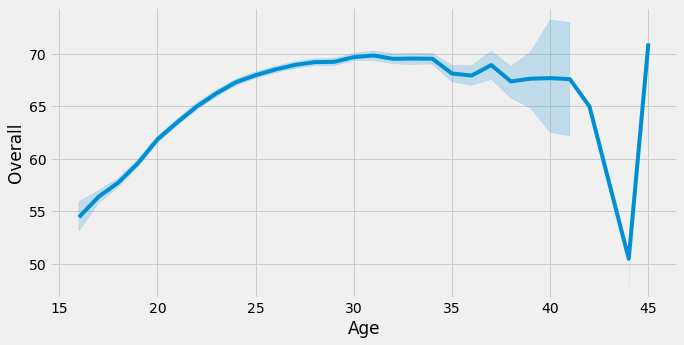

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Age", y="Overall", data=df)

Invertidamente, podemos observar que desde la calificación minima (47) que tenemos en el dataset hasta un 70, hay una relacón directa (correlación) con la edad, que se meseta en los casi 28 años.

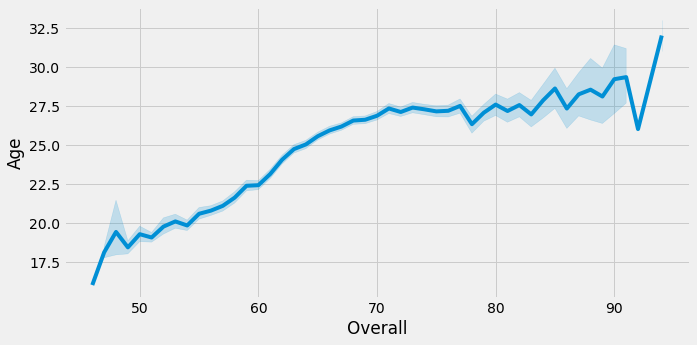

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Overall", y="Age", data=df)

In [25]:
df[df['Age'] >= 40].sort_values(by=['Age'])

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4440000,85470,Right,4.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 6, 2018",6'4,203lbs,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,28.0,49.0,43.0,55.0,79.0,49.0,39.0,75.0,39.0,69.0,13.0,38.0,28.0,12.0,50.0,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,8214000,GK,> 35
219344,A. Al Basisi,40,Saudi Arabia,57,57,Ohod Club,11100,1110,Right,1.0,3.0,1.0,Medium/ Medium,Stocky,No,GK,22.0,"Aug 1, 2014",6'0,190lbs,16.0,19.0,15.0,21.0,11.0,13.0,20.0,19.0,18.0,20.0,46.0,49.0,38.0,50.0,49.0,19.0,58.0,37.0,79.0,17.0,22.0,25.0,17.0,16.0,28.0,42.0,30.0,13.0,20.0,57.0,55.0,54.0,58.0,57.0,18870,GK,> 35
28157,P. van der Vlag,40,Netherlands,58,58,FC Emmen,11100,1110,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 20, 2017",6'1,168lbs,12.0,11.0,15.0,28.0,17.0,15.0,21.0,12.0,25.0,26.0,30.0,28.0,25.0,51.0,25.0,19.0,60.0,27.0,60.0,15.0,31.0,21.0,9.0,39.0,11.0,45.0,12.0,15.0,17.0,54.0,63.0,59.0,61.0,51.0,16650,GK,> 35
156480,Y. Nakazawa,40,Japan,61,61,Yokohama F. Marinos,0,1110,Right,2.0,3.0,2.0,Low/ High,Normal,No,CB,22.0,"Jan 1, 2002",6'2,172lbs,44.0,40.0,67.0,62.0,40.0,40.0,47.0,35.0,59.0,63.0,29.0,30.0,28.0,41.0,50.0,59.0,42.0,28.0,55.0,21.0,69.0,61.0,21.0,66.0,31.0,69.0,64.0,64.0,57.0,10.0,9.0,7.0,9.0,8.0,0,DEF,> 35
214372,W. Díaz,40,Colombia,63,63,Jaguares de Córdoba,0,1110,Right,1.0,3.0,2.0,Low/ Medium,Stocky,No,LCB,18.0,"Jan 10, 2016",5'10,168lbs,56.0,19.0,71.0,47.0,24.0,38.0,27.0,23.0,32.0,45.0,32.0,33.0,52.0,56.0,67.0,40.0,83.0,31.0,72.0,17.0,72.0,57.0,30.0,29.0,35.0,55.0,71.0,61.0,53.0,9.0,13.0,12.0,13.0,9.0,0,DEF,> 35
49511,F. Kippe,40,Norway,65,65,Lillestrøm SK,0,1110,Left,1.0,3.0,2.0,Low/ Medium,Normal,No,LCB,13.0,"Feb 22, 2002",6'4,214lbs,33.0,46.0,70.0,56.0,43.0,24.0,51.0,53.0,55.0,49.0,24.0,25.0,27.0,66.0,31.0,70.0,44.0,41.0,93.0,52.0,76.0,63.0,40.0,49.0,62.0,64.0,62.0,58.0,55.0,14.0,9.0,10.0,6.0,11.0,0,DEF,> 35
100899,S. Phillips,40,England,52,52,Yeovil Town,0,1110,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,25.0,"Aug 1, 2017",6'1,165lbs,13.0,15.0,11.0,15.0,13.0,15.0,12.0,13.0,15.0,22.0,28.0,32.0,38.0,57.0,33.0,12.0,44.0,23.0,53.0,12.0,34.0,18.0,14.0,10.0,13.0,63.0,15.0,12.0,17.0,48.0,54.0,47.0,53.0,46.0,0,GK,> 35
176540,B. Castillo,40,Colombia,66,66,Atlético Huila,44400,1110,Right,1.0,1.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jan 6, 2017",6'1,190lbs,12.0,10.0,20.0,25.0,12.0,16.0,14.0,11.0,21.0,23.0,34.0,42.0,37.0,64.0,40.0,25.0,42.0,30.0,60.0,9.0,23.0,21.0,13.0,45.0,24.0,26.0,30.0,10.0,19.0,60.0,66.0,64.0,73.0,63.0,59940,GK,> 35
156483,C. Lucchetti,40,Argentina,71,71,Atlético Tucumán,177600,4440,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 25, 2012",6'0,152lbs,23.0,13.0,23.0,34.0,18.0,24.0,27.0,30.0,32.0,35.0,40.0,45.0,44.0,69.0,45.0,40.0,62.0,35.0,55.0,16.0,45.0,17.0,16.0,51.0,54.0,41.0,21.0,22.0,13.0,71.0,68.0,75.0,64.0,75.0,266400,GK,> 35


#### Edad vs calificación general por posición
Puede observarse que desde los 18 hasta los 21 años, los jugadores de todas las posiciones tienen una calificación similar. Desde los 21 hasta los 26 años aproximadamente la calificación de los mediocampistas es superior, y a partir de los 26 es cuando vemos que los delanteros superan a los mediocampistas hasta el fin de su carrera. A los 34 años los mediocampistas y defensores tienen su declive, mientras que en los delanteros, no es tan notable. 

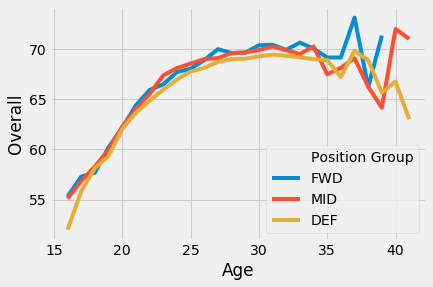

In [26]:
sns.lineplot(x="Age", y="Overall", hue="Position Group", ci=None, data=df[df["Position Group"]!='GK'])

### Valuación de los jugadores
Las valoraciones de los jugadores muestran un sesgo muy positivo, siendo sesgado por estrellas como Messi, Neymar, De Bryune, Hazard y Dybala. Estos jugadores y otros mas forman una larga cola, propia de outliers.

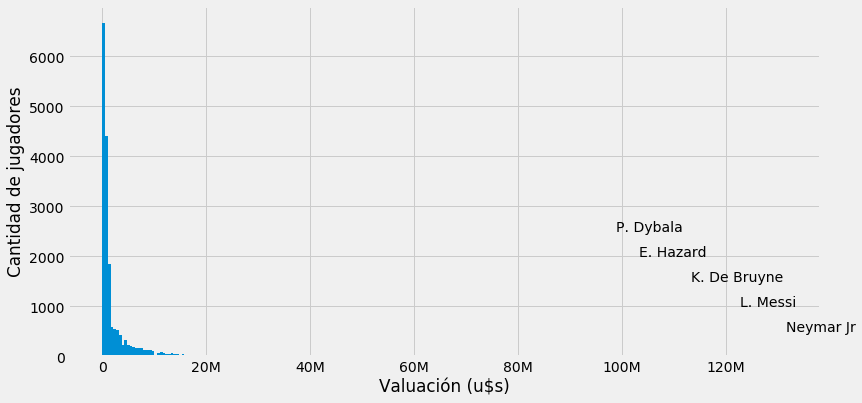

In [27]:



num_bins = 250

fig, ax = plt.subplots(figsize=(12,6))

most_expensive_players_df = df.sort_values(by=['Value'], ascending=False)[['Name', 'Value']].head()

axis_y_height = 500
for index, row in most_expensive_players_df.iterrows():
    ax.annotate(row['Name'], (row['Value'], axis_y_height))
    axis_y_height = axis_y_height + 500

ax.hist(df['Value'], num_bins)
#formatter = ticker.FormatStrFormatter('$%1.2f')
#ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Valuación (u$s)')
ax.set_ylabel('Cantidad de jugadores')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


### Edad vs valuaciones
Es intuitivo pensar que los jugadores mejoran con la edad y la experiencia y que sus valoraciones reflejarán esta relación.

Al trazar la relación a continuación, se puede ver que a medida que los jugadores envejecen, sus valoraciones tienden a aumentar hasta los 30 años, y luego comienzan a disminuir en los años de edad entre los 31 y los 35 años, y luego disminuyen rápidamente en el caso de los jugadores mayores de 35 años. Esto concuerda con un analisis anterior, cuando se analizó la calificación general en función de la edad del jugador. Las valuaciones del grafico se encuentran en escala logaritmica, asi las diferencias entre los grupos de edades son significativas.

<Figure size 864x504 with 0 Axes>

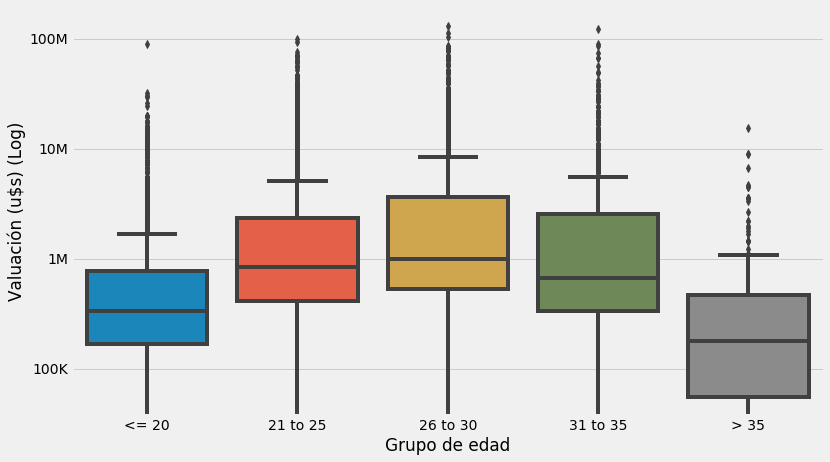

In [28]:
plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(12, 7))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Age Group", y="Value", data=df, order=["<= 20", "21 to 25", "26 to 30", "31 to 35", "> 35"])

ax.set_xlabel('Grupo de edad')
ax.set_ylabel('Valuación (u$s) (Log)')

#fmt = '${x:,.0f}'
#tick = ticker.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(reformat_large_tick_values)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


### Posiciones vs valuaciones
Como era de esperar, los delanteros y mediocampistas son más caros que defensores y arqueros.

Específicamente, los delanteros de izquierda (LF) y derecha (RW) y los delanteros de ataque de izquierda (LAM) y derecha (RAM) son las posiciones más caras.


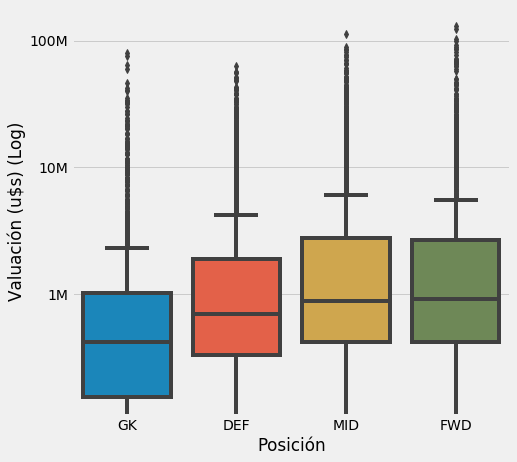

In [29]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(7, 7))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position Group", y="Value", data=df, order=["GK", "DEF", "MID", "FWD"])

ax.set_xlabel('Posición')
ax.set_ylabel('Valuación (u$s) (Log)')

#fmt = '${x:,.0f}'
#tick = ticker.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(reformat_large_tick_values)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

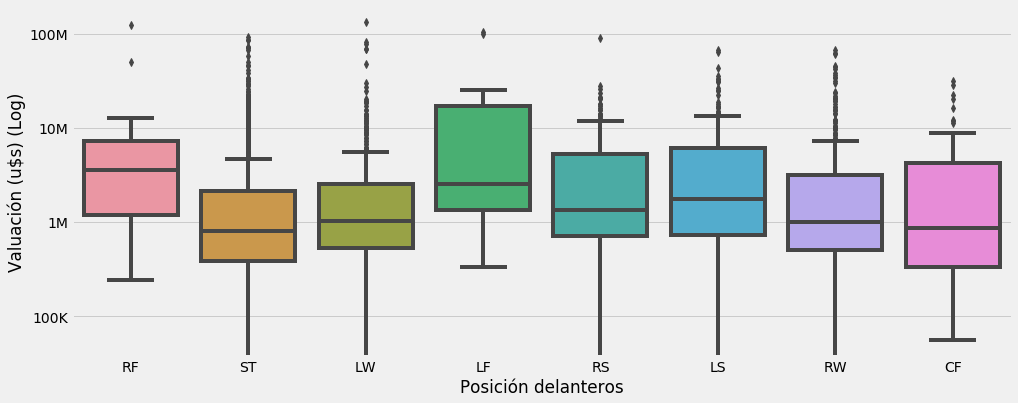

In [30]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position", y="Value", data=df[df['Position Group'] == 'FWD'])


ax.set_xlabel('Posición delanteros')
ax.set_ylabel('Valuación (u$s) (Log)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


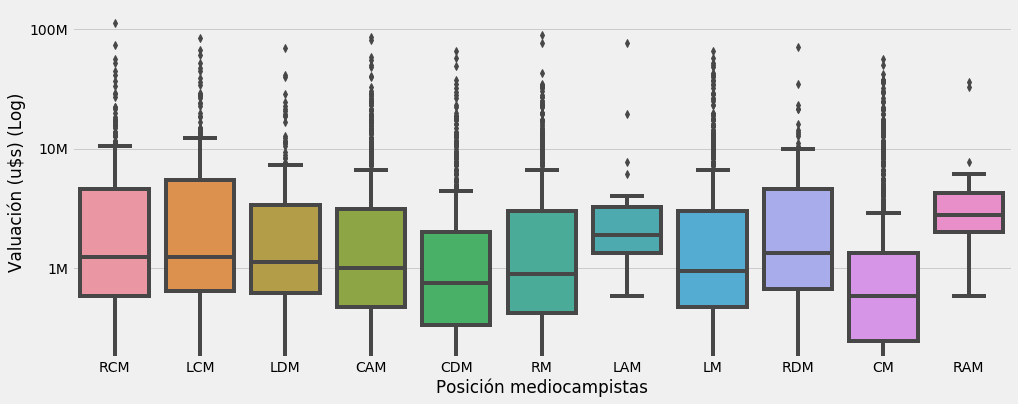

In [31]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position", y="Value", data=df[df['Position Group'] == 'MID'])


ax.set_xlabel('Posición mediocampistas')
ax.set_ylabel('Valuación (u$s) (Log)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


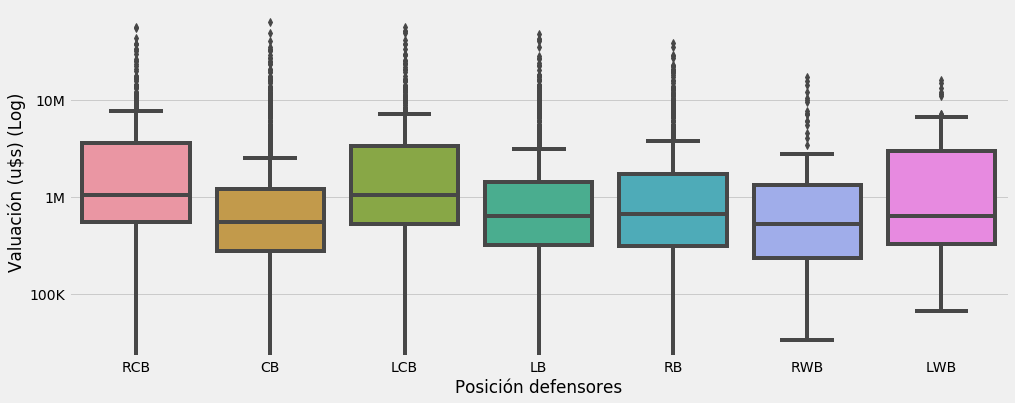

In [32]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position", y="Value", data=df[df['Position Group'] == 'DEF'])


ax.set_xlabel('Posición defensores')
ax.set_ylabel('Valuación (u$s) (Log)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


### Calificaciones vs Valuaciones
Existe una fuerte relación positiva entre la calificación y la valuación de los jugadores con una correlación de Spearman de 0,9081. Se utilizó el método Spearman para calcular la correlación debido a la presencia de grandes valores atípicos.


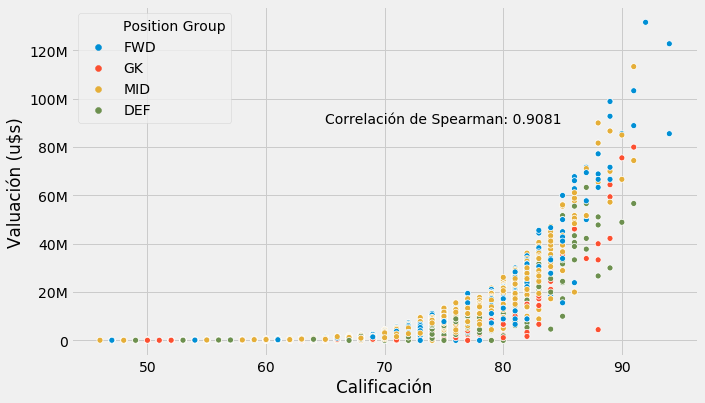

In [33]:
correlation = df[['Value', 'Overall']].corr(method='spearman').iloc[0,1]

f, ax = plt.subplots(figsize=(10, 6))

ax.annotate('Correlación de Spearman: {:.4f}'.format(correlation), (65, 90000000))

sns.scatterplot(x="Overall", y="Value", data=df, hue="Position Group")

ax.set_xlabel('Calificación')
ax.set_ylabel('Valuación (u$s)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));



### Correlación de Calificación General (Overall) con otras variables

La siguiente matriz de correlación de datos muestra las correlaciones entre la calificación general y otras variables de atributos clave para todos los jugadores, excepto los arqueros. Se utilizaron los métodos de correlación de Pearson y Spearman para mostrar las diferencias.

El método de correlación de Spearman es más robusto cuando se trata de valores atípicos extremos, de ahí que la valuación (Value) del jugador tenga la mayor correlación (0,9159). Reacciones (Reactions), Composición (Composure), 
Salario (Wage), Clausula de recision (Release Clause) resumen las 5 variables correlacionadas más importantes a la Calificación general usando el método Spearman.

Utilizando el método Pearson, obtenemos diferentes resultados. Las 5 variables más correlacionadas con la clasificación general son Reacciones, Composición, Pase corto (ShortPassing), Contról de la pelota (BallControl) y Potencial. Tanto la valuación como el salario no aparecen en esta lista porque son propensos a grandes valores atípicos.


In [34]:
correlaciones_spearman = df[df['Position'] != 'GK'].corr(method='spearman')
correlaciones_pearson = df[df['Position'] != 'GK'].corr(method='pearson')

In [35]:
correlaciones_spearman_top10 = correlaciones_spearman.sort_values(by=['Overall'], ascending=False)[['Overall']].head(10).iloc[1:]
#correlaciones_spearman_top10['Field'] = correlaciones_spearman_top10.index
correlaciones_spearman_top10.rename(columns={'Overall':'Spearman'}, inplace=True)
correlaciones_spearman_top10


,Spearman
Value,0.915902
Reactions,0.843035
Composure,0.792832
Wage,0.778413
Release Clause,0.748002
BallControl,0.732756
ShortPassing,0.720960
Potential,0.614505
ShotPower,0.592828


In [36]:
correlaciones_pearson_top10 = correlaciones_pearson.sort_values(by=['Overall'], ascending=False)[['Overall']].head(10).iloc[1:]
#correlaciones_pearson_top10['Field'] = correlaciones_pearson_top10.index
correlaciones_pearson_top10.rename(columns={'Overall':'Pearson'}, inplace=True)
correlaciones_pearson_top10

,Pearson
Reactions,0.847722
Composure,0.801772
ShortPassing,0.722615
BallControl,0.717802
Potential,0.650483
Value,0.634844
Release Clause,0.596476
LongPassing,0.585374
Wage,0.575823


In [37]:
pd.concat([correlaciones_spearman_top10, correlaciones_pearson_top10], axis=1).sort_values(by=['Spearman'], ascending=False)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Spearman,Pearson
Value,0.915902,0.634844
Reactions,0.843035,0.847722
Composure,0.792832,0.801772
Wage,0.778413,0.575823
Release Clause,0.748002,0.596476
BallControl,0.732756,0.717802
ShortPassing,0.720960,0.722615
Potential,0.614505,0.650483
ShotPower,0.592828,NaN
LongPassing,NaN,0.585374


### Atributos por posición

El mapa de calor que se muestra a continuación muestra la mediana de los atributos para cada posición. El análisis se realizó en jugadores que no son arqueros, y también sólo en jugadores con una calificación general de 75 o superior.

Se muestra que los centrales defensivos son de mucha fuerza y agresivos. Los laterales derecho e izquierdo y los delanteros izquierdo son muy ágiles, mientras que los mediocampistas izquierdo y derecho tienen una gran aceleración.


In [38]:
not_attributes_columns = [
    'Age','Overall','Potential','Value','Wage','International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
]


df_base_select = df[(df['Overall'] >= 70) & (df['Position'] != 'GK')]
df_pos_pos_groups = df_base_select[['Position Group', 'Position']]

df_numerics = df_base_select.select_dtypes(include='number')
df_numerics = df_numerics.loc[:, list(map(lambda x: x not in not_attributes_columns, list(df_numerics.columns)))]

df_numerics = pd.concat([df_pos_pos_groups, df_numerics], axis=1)

df_numerics.head()

,Position Group,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,FWD,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
20801,FWD,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
190871,FWD,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
192985,MID,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
183277,FWD,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0


In [39]:
df_numerics = df_numerics.groupby(['Position Group', 'Position'], as_index = False).median()
df_numerics.head()


,Position Group,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,DEF,CB,45.0,34.0,74.0,66.0,33.0,51.0,39.0,35.0,61.0,62.0,58.0,61.0,55.0,69.0,55.0,58.0,73.0,67.0,79.0,38.0,75.0,72.0,37.0,47.0,44.0,68.0,72.0,74.0,72.0
1,DEF,LB,73.0,49.0,62.5,71.0,49.0,71.0,67.0,55.0,65.5,71.0,76.0,76.0,73.0,71.0,72.0,68.0,72.0,78.0,68.0,59.0,72.0,71.0,63.0,61.0,51.0,68.0,70.0,73.0,72.0
2,DEF,LCB,46.0,35.0,73.0,66.0,35.0,53.0,39.0,37.0,62.0,62.0,60.0,63.0,57.0,69.0,57.0,59.0,76.0,70.0,80.0,40.0,75.0,73.0,38.0,49.0,44.0,68.0,72.0,74.0,72.0
3,DEF,LWB,73.0,51.0,59.0,72.0,47.0,73.0,67.0,62.0,67.0,74.0,77.0,77.0,74.0,72.0,72.0,70.0,71.0,79.0,67.0,61.0,72.0,72.0,68.0,65.0,59.0,70.0,69.0,74.0,74.0
4,DEF,RB,72.0,47.0,63.0,70.0,47.0,70.0,63.0,47.0,65.0,71.0,76.0,77.0,73.0,71.0,71.0,66.0,72.0,78.0,68.0,56.0,72.0,71.0,63.0,60.0,50.0,67.0,70.0,73.0,73.0


Text(36.1, 0.5, '')

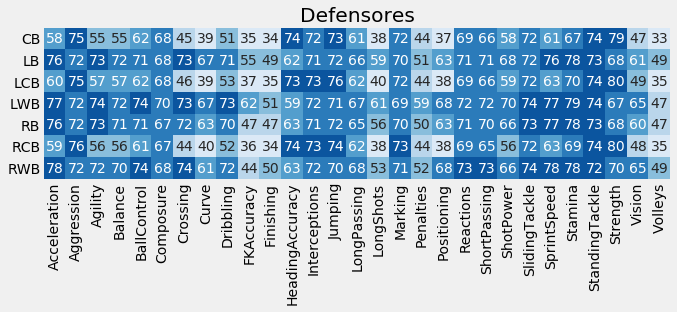

In [40]:
df_def = df_numerics[df_numerics['Position Group'] == 'DEF'].iloc[:,1:]
df_def = pd.melt(df_def, id_vars=["Position"], var_name="Skill", value_name="Value")
df_def=df_def.pivot("Position", "Skill", "Value")

fig, ax = plt.subplots(1, figsize=(10, 4))

g = sns.heatmap(df_def,annot=True, cmap=sns.color_palette("Blues"), cbar=False,square=True) #sns.light_palette("green")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
ax.set_title('Defensores')
plt.xlabel('')
plt.ylabel('')


Text(41.794545454545386, 0.5, '')

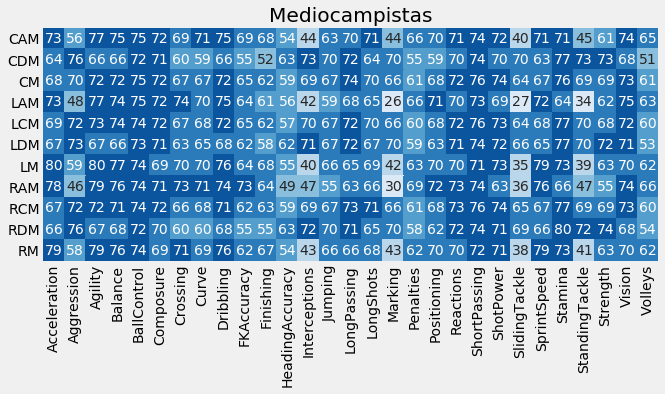

In [41]:
df_mid = df_numerics[df_numerics['Position Group'] == 'MID'].iloc[:,1:]
df_mid = pd.melt(df_mid, id_vars=["Position"], var_name="Skill", value_name="Value")
df_mid=df_mid.pivot("Position", "Skill", "Value")

fig, ax = plt.subplots(1, figsize=(10, 4))

g = sns.heatmap(df_mid,annot=True, cmap=sns.color_palette("Blues"), cbar=False,square=True) #sns.light_palette("green")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
ax.set_title('Mediocampistas')
plt.xlabel('')
plt.ylabel('')

Text(36.1, 0.5, '')

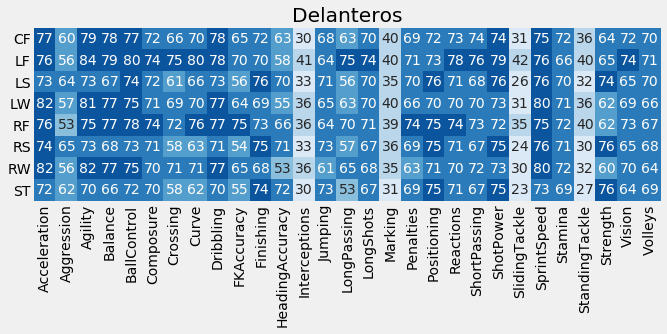

In [42]:
df_fwd = df_numerics[df_numerics['Position Group'] == 'FWD'].iloc[:,1:]
df_fwd = pd.melt(df_fwd, id_vars=["Position"], var_name="Skill", value_name="Value")
df_fwd=df_fwd.pivot("Position", "Skill", "Value")

fig, ax = plt.subplots(1, figsize=(10, 4))

g = sns.heatmap(df_fwd,annot=True, cmap=sns.color_palette("Blues"), cbar=False,square=True) #sns.light_palette("green")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
ax.set_title('Delanteros')
plt.xlabel('')
plt.ylabel('')


In [43]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

## Ayuda/asistencia al dirigir un equipo
La siguiente sección estará dedicada al análisis que ayudará a aquellos que deseen armar un equipo. Se analizará qué jugadores elegir si se quiere dirigir un equipo en modo de reconstrucción, a qué jugadores elegir con un presupuesto bajo si se dirige equipos de divisiones inferiores o equipos de menor presupuesto, qué equipos dirigir si se quiere un equipo ofensivo o un equipo defensivo.


### Análisis de Jugadores Jóvenes
Si la idea es armar un equipo que de oportunidades a jugadores jovenes y los vea desarrollarse hasta alcanzar su plenitud entonces la lista de jugadores que se muestra a continuación puede ser de gran utilidad. Los jugadores estan ordenados descendentemente por el remanente de calificación que todavia pueden alcanzar.

Las barras celestes indican la diferencia entre el potencial del jugador y su nivel de de calificación general actual. J. von Moos, delantero (17 años y 310.000 dólares) y D. Campbell, centrocampista (también de 17 años y sólo cuesta 66.000 dólares) son los dos jugadores con más posibilidades de crecimiento, con un diferencial de 26 puntos. B. Gilmour, mediocampista central, también de 17 años, tiene un potencial de 84, pero cuesta 610.000 dólares. Sé a quién elegiría entre Griffiths y J. von Moos, que también tiene una puntuación total de 84. Uno vale la mitad del otro.

Si lo que se busca es una ganga, el mediocampista central B. Mumba, de 16 años, cuesta 211.000 dólares y tiene un potencial de 80.... Tentador!

In [44]:
#  gather(key = Mult, value = ExpectedValue, -Name, -Value, -Age, -Position) %>%
#  mutate(Mult = factor(x=Mult, levels = c("RoomToGrow", "Overall")))


df_growing_room = df.copy()
df_growing_room['RoomToGrow'] = df_growing_room['Potential'] - df_growing_room['Overall']
df_growing_room['OverallPlusRoomToGrow'] = df_growing_room['RoomToGrow'] + df_growing_room['Overall']
df_growing_room = df_growing_room.sort_values(by=['RoomToGrow'], ascending=False)[['Name', 'Value', 'Overall', 'Age', 'RoomToGrow', 'Position', 'OverallPlusRoomToGrow']]
df_growing_room = df_growing_room.head(20)
#df_growing_room = df_growing_room.sort_values(by=['Overall'], ascending=False)
df_growing_room['NameAgeValue'] = df_growing_room.agg(lambda x: f"{x['Name']} ({x['Age']} años) (u$s {human_format(x['Value'])})", axis=1)
df_growing_room


,Name,Value,Overall,Age,RoomToGrow,Position,OverallPlusRoomToGrow,NameAgeValue
ID,,,,,,,,
238758,D. Campbell,66600,50,17,26,CM,76,D. Campbell (17 años) (u$s 66.6K)
244592,J. von Moos,310800,58,17,26,ST,84,J. von Moos (17 años) (u$s 311K)
243353,B. Mumba,210900,55,16,25,CM,80,B. Mumba (16 años) (u$s 211K)
246241,Y. Lenze,210900,57,17,25,GK,82,Y. Lenze (17 años) (u$s 211K)
246100,K. Askildsen,122100,52,17,25,CM,77,K. Askildsen (17 años) (u$s 122K)
241403,A. Dabo,721500,62,17,24,LM,86,A. Dabo (17 años) (u$s 722K)
245370,E. Destanoglu,55500,50,17,24,GK,74,E. Destanoglu (17 años) (u$s 55.5K)
243621,N. Ayéva,77700,48,16,24,ST,72,N. Ayéva (16 años) (u$s 77.7K)
245721,G. Azzinnari,388500,59,17,24,ST,83,G. Azzinnari (17 años) (u$s 388K)


[Text(0, 0.5, ''), (0, 100), Text(0.5, 0, 'Calificación')]

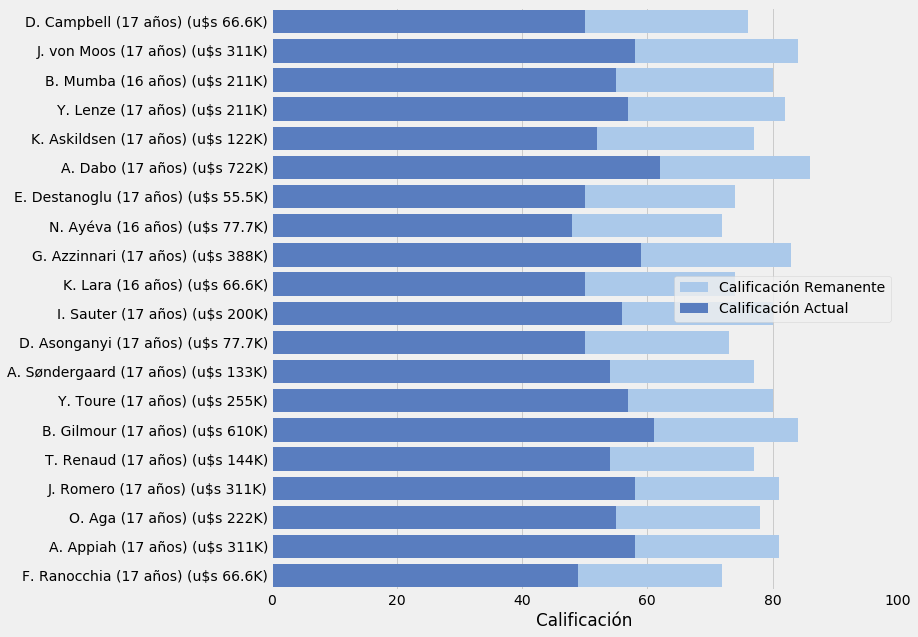

In [45]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="OverallPlusRoomToGrow", y="Name", data=df_growing_room,
            label="Calificación Remanente", color="b")

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x="Overall", y="NameAgeValue", data=df_growing_room,
            label="Calificación Actual", color="b")

#for index, row in df_growing_room.iterrows():
    #ax.annotate(row['Name'], row['Overall'])
#    g.text(row['Name'],row.Overall, round(row.OverallPlusRoomToGrow,2), color='black', ha="center")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="right")
ax.set(xlim=(0, 100), ylabel="",  xlabel="Calificación")
#sns.despine(left=True, bottom=True)

## ¿Cuándo termina el potencial de un jugador?

Gran debate que implica poder conocer a que edad un jugador alcanza su plenitud. ¿Hay una edad en la que los jugadores finalmente sueltan todo su potencial, o hay espacio para crecer a lo largo de sus carreras?

Parece como si el potencial de un jugador y su calificación general convergen aproximadamente a los 30 años de edad, 29 años para ser mas exactos..
Se tomó la calificación general y potencial promedio por edad para realizar el análisis.

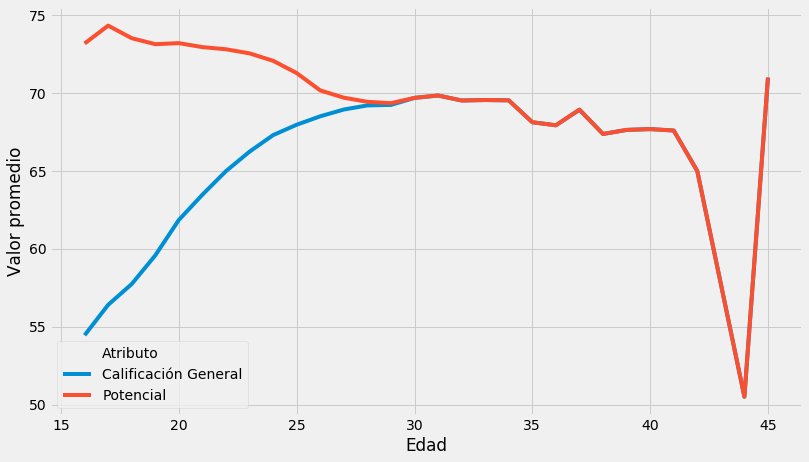

In [46]:
plt.figure(figsize=(12, 7))
df_over_pot_age = df.groupby('Age', as_index = False).mean()[['Age', 'Overall', 'Potential']]
df_over_pot_age.rename(columns={'Overall':'Calificación General', 'Potential':'Potencial', 'Age':'Edad'}, inplace=True)
df_over_pot_age = pd.melt(df_over_pot_age, id_vars=["Edad"], var_name="Atributo", value_name="Valor promedio")
#df_over_pot_age

sns.lineplot(x="Edad", y="Valor promedio", hue="Atributo", data=df_over_pot_age)
#df_mid=df_mid.pivot("Position", "Skill", "Value")

### Jugadores de Valuación cero
¿Se pueden hacer negocios de verdad? Parece que si. A continuación se muestran todos los jugadores que tienen una valuación gratuita (igual a cero), y muestra la edad de un jugador en comparación con su calificación general actual.

Dependiendo de lo que se este buscando, cualquiera de los cuadrantes de arriba a la izquierda o de arriba a la derecha es donde están los jugadores a los que se tiene que apuntar. El mejor jugador al que dirigirse es L. Paredes, un mediocampista central bastante joven de 24 años con una calificación general de 80 (y mejor aún, un potencial de 85).

P. Mahlambi, un mediocampista central ofensivo sudafricano de 20 años con un potencial de 84 es otro gran objetivo, al igual que el central defensivo derecho B. Méndez de 18 años y el mediocampista central ofensivo I. Hagi de 19 años.

En la zona de la izquierda se encuentran jugadores que por su edad, pueden alcanzar su potencial todavia, gran apuesta a futuro. En la zona de la derecha se encuentran jugadores mas adultos, donde no hay mucho a futuro, pero de gran actualidad para el presente, recordando que son jugadores sin precio, bienvenidos en cualquier equipo.
En el gráfico, los jugadores de verde, tienen un potencial mayor a 80.

c:\program files\python37\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(39, 79, 'Zona para ganar ya')

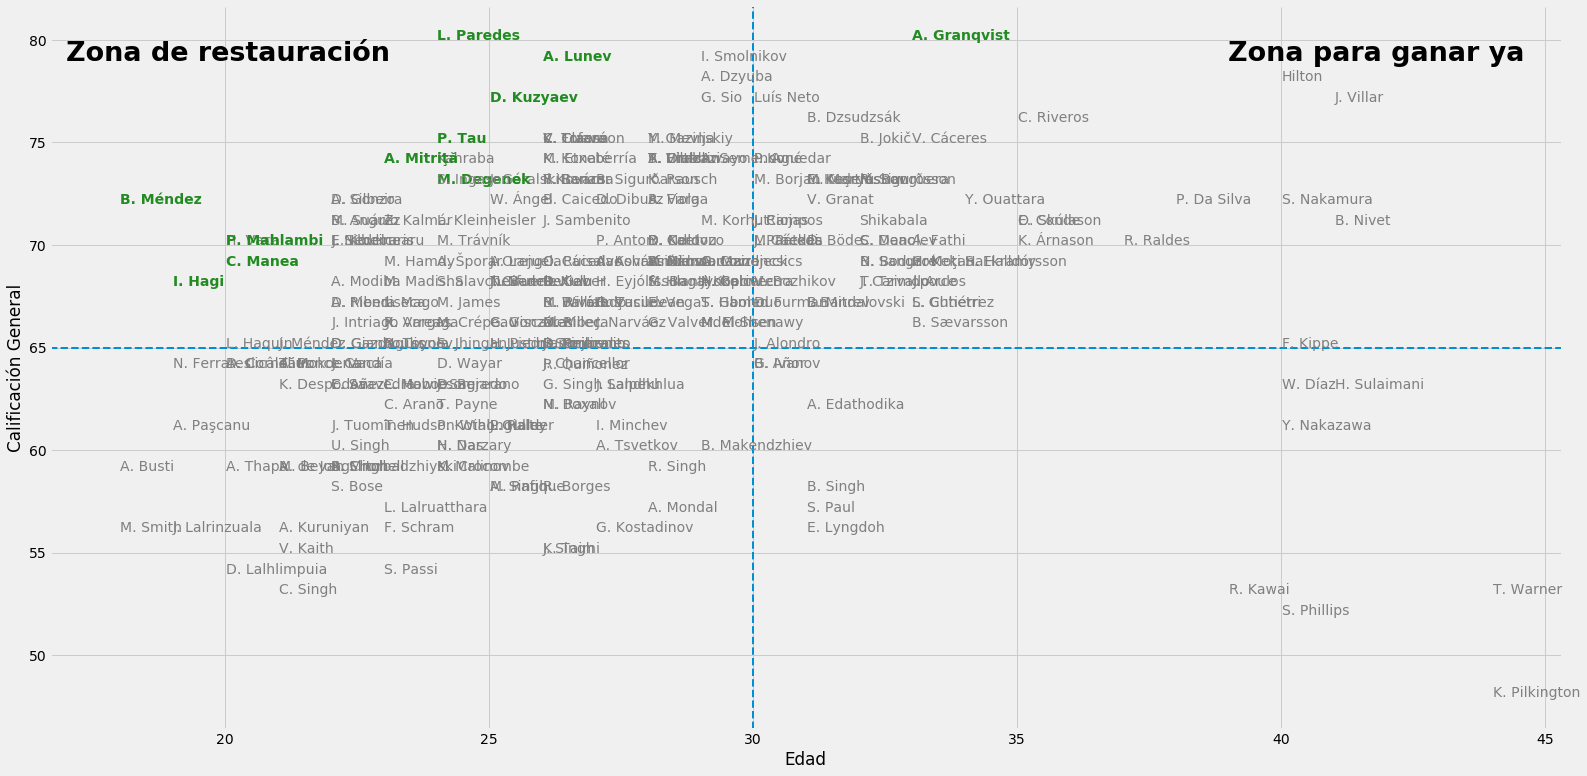

In [47]:
df_zero_value = df[df['Value'] == 0]


ax = sns.lmplot('Age', # Horizontal axis
           'Overall', # Vertical axis
           data=df_zero_value, # Data source
           fit_reg=False, # Don't fix a regression line
           size = 11,
           aspect =2,
               scatter_kws={"s": 0})

#plt.title('Example Plot')
plt.xlabel('Edad')
plt.ylabel('Calificación General')

plt.axvline(30,ls='--', lw='2')
plt.axhline(65,ls='--', lw='2')


#plt.axhline(0, 65)

def label_point(x, y, val, potential, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val, 'potential': potential}, axis=1)
    for i, point in a.iterrows():
        if point['potential'] >= 80:
            color = 'forestgreen'
            fontweight = 'bold'
        else:
            color = 'gray'
            fontweight = 'normal'

        ax.text(point['x']+.02, point['y'], str(point['val']),color=color, fontweight=fontweight)

label_point(df_zero_value.Age, df_zero_value.Overall, df_zero_value.Name, df_zero_value.Potential, plt.gca())

plt.gca().text(17, 79, 'Zona de restauración', fontsize=27, fontweight='bold')
plt.gca().text(39, 79, 'Zona para ganar ya', fontsize=27, fontweight='bold')

## ¿Qué equipo quiero dirigir?
Esta sección está diseñada para ayudar a los futuros managers a decidir qué equipo dirigir, basándose en varios factores.

Se realizó un análisis de los equipos más jóvenes y más viejos, de los más talentosos, de los grandes equipos ofensivos, de los equipos más caros y de los equipos con las mayores valoraciones de jugadores.

### Edad del equipo
Si la persona que cumple la función de manager, es del tipo de manager que le gusta hacerse cargo de los equipos más jóvenes, entonces algunos de los equipos europeos son ideales. El FC Nordsjælland (danés) es el equipo más joven de media en FIFA19, con una edad media de 20,3 años, seguido por el FC Groningen (holandés) con 21,4 años y el Bohemian FC (irlandés) con 21,5 años. Curiosamente, el PSV y el Ajax holandés están entre los 20 equipos más jóvenes. Ciertamente son el tipo de equipos que uno buscaría.

En el otro extremo, si al manager le gustán los equipos más avanzados en edad, entonces los equipos Brasileros son los ideales, 15 de los 20 equipos seleccionados con jugadores mayores, son de Brasil.

En el gráfico se listaron los 20 equipos con mayor promedio de edad, versus, los 20 equipos con edad promedio menor. Los clubes nórdicos son mas jóvenes que los Brasileros.


In [48]:
age_avg = df['Age'].mean()
age_sd = df['Age'].std()

df_club_grouped = df.groupby('Club').mean()[['Age']]
df_club_grouped.reset_index(level='Club', inplace=True)
df_club_grouped['Age_zscore'] = ((df_club_grouped['Age'] - age_avg) / age_sd)
df_club_grouped['AgeType'] = np.where(df_club_grouped['Age_zscore'] < 0, "Jóvenes", "Adultos")

df_oldest_clubes = df_club_grouped.sort_values(by=['Age_zscore'], ascending=False).head(20)
df_youngest_clubes = df_club_grouped.sort_values(by=['Age_zscore'], ascending=False).tail(20)

df_clubes_age = pd.concat([df_oldest_clubes, df_youngest_clubes], axis=0)
df_clubes_age.reset_index(inplace = True, drop = True)

df_clubes_age

,Club,Age,Age_zscore,AgeType
0,Paraná,31.600000,1.387125,Adultos
1,Cruzeiro,30.600000,1.172990,Adultos
2,Atlético Paranaense,30.400000,1.130163,Adultos
3,Botafogo,30.400000,1.130163,Adultos
4,Chapecoense,30.400000,1.130163,Adultos
5,Ceará Sporting Club,30.200000,1.087335,Adultos
6,Sport Club do Recife,30.200000,1.087335,Adultos
7,Fluminense,30.200000,1.087335,Adultos
8,Grêmio,30.000000,1.044508,Adultos
9,Bahia,30.000000,1.044508,Adultos


[]

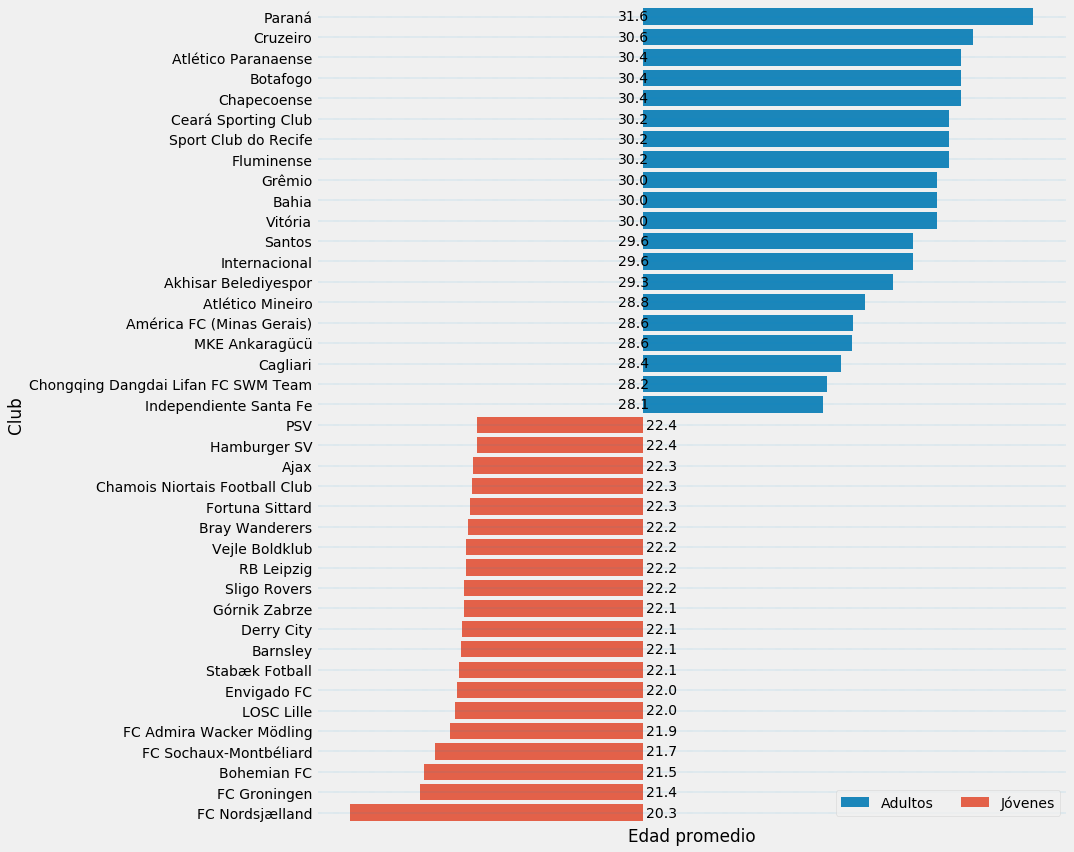

In [49]:
f, ax = plt.subplots(figsize=(12, 14))

sns.barplot(x="Age_zscore", y="Club", data=df_clubes_age, hue="AgeType",dodge = False)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Club", xlabel="Edad promedio")

for index, row in df_clubes_age.iterrows():
    xpos = 0.01 if row['Age_zscore'] < 0 else -0.09
    ypos = (index + 0.2) #(index + 0.2) if row['Age_zscore'] < 0 else index + 0.3
    ax.annotate(str(round(row['Age'], 1)), (xpos, ypos))
    ax.axhline(index,  ls='--', lw='0.2') #xmax=0.43,


ax.set_xticks([])
#sns.despine(ax=ax,left=True, bottom=True)

### Calificación general a nivel equipo
Si se esta tratando de elegir al equipo más talentoso, la forma en que se interprete "talento" puede tener un impacto diferente en el equipo que se termine conformando.

En cuanto a las calificaciones medias generales de cada equipo, cuatro de los cinco equipos mejor valorados provienen de la Serie A (Juventus, Napoli, Inter y Milan), siendo el Real Madrid el único equipo no italiano entre los cinco primeros. FC Barcelona, PSG, Roma, Man Utd y FC Bayer Munich completan el top 10.

Los equipos Italianos tienen las calificaciones generales globales más altas. En el gráfico se encuentran los 20 equipos mejor rankeados por su calificación general promedio en forma descendiente, mostrando la distribución de los jugadores de cada uno de estos 20 equipos. En naranja, los top 3.

In [50]:
df_top_20_clubes = df.groupby('Club').mean()[['Overall']]
df_top_20_clubes.reset_index(level='Club', inplace=True)
df_top_20_clubes = df_top_20_clubes.sort_values(by=['Overall'], ascending=False).head(20)
top_20_clubes = df_top_20_clubes['Club'].tolist()
top_20_clubes

['Juventus',
 'Napoli',
 'Inter',
 'Real Madrid',
 'Milan',
 'FC Barcelona',
 'Paris Saint-Germain',
 'Roma',
 'Manchester United',
 'FC Bayern München',
 'SL Benfica',
 'Chelsea',
 'Manchester City',
 'Tottenham Hotspur',
 'FC Porto',
 'Sporting CP',
 'Liverpool',
 'Bayer 04 Leverkusen',
 'Lazio',
 'Borussia Dortmund']

In [51]:
df_players_top20_clubes = df[df['Club'].isin(top_20_clubes)]
df_players_top20_clubes['Top3'] = df_players_top20_clubes['Club'].isin(top_20_clubes[0:3])
df_players_top20_clubes

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group,Top3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,122655000,627150,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,251415000,FWD,31 to 35,False
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,85470000,449550,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,141081000,FWD,31 to 35,True
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,131535000,321900,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,253191000,FWD,26 to 30,False
193080,De Gea,27,Spain,91,93,Manchester United,79920000,288600,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,153846000,GK,26 to 30,False
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,113220000,394050,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,218004000,MID,26 to 30,False
183277,E. Hazard,27,Belgium,91,91,Chelsea,103230000,377400,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,191031000,FWD,26 to 30,False
177003,L. Modrić,32,Croatia,91,91,Real Madrid,74370000,466200,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",5'8,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,152514000,MID,31 to 35,False
176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,88800000,505050,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,"Jul 11, 2014",6'0,190lbs,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,182040000,FWD,31 to 35,False
155862,Sergio Ramos,32,Spain,91,91,Real Madrid,56610000,421800,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",6'0,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,116106000,DEF,31 to 35,False


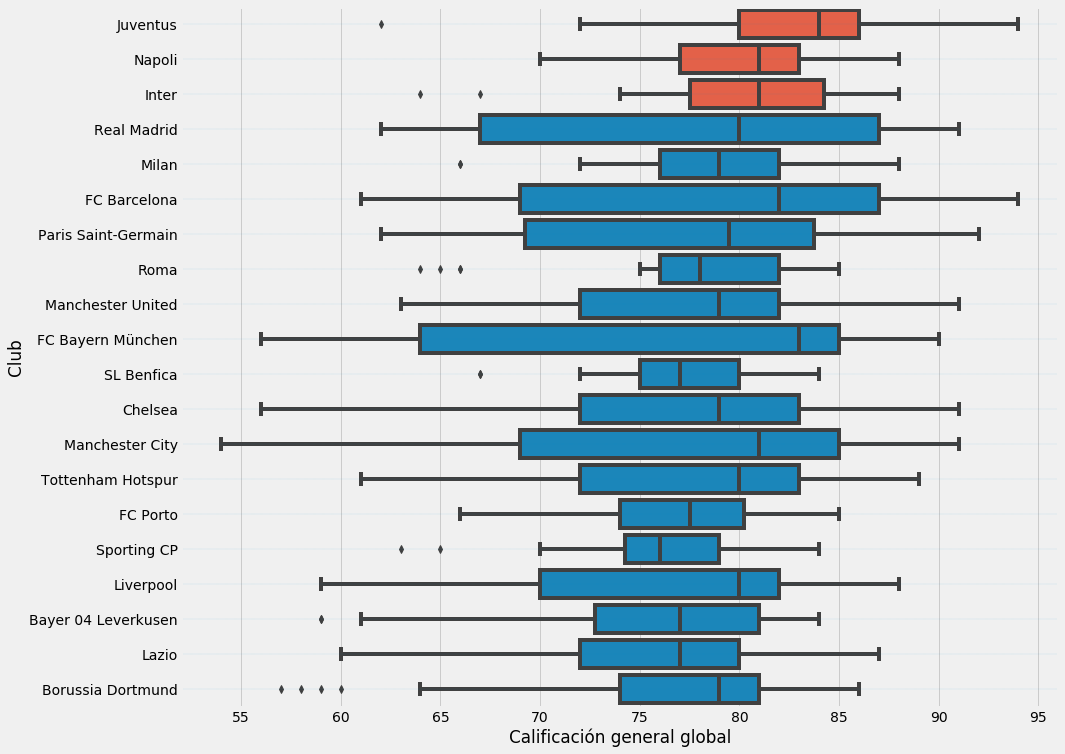

In [52]:
f, ax = plt.subplots(figsize=(14, 12))

sns.boxplot(y="Club", x="Overall", data=df_players_top20_clubes, order=top_20_clubes, hue="Top3", dodge=False)

ax.get_legend().remove()
ax.set(ylabel="Club", xlabel="Calificación general global")

for i in range(0, 20):
    ax.axhline(i,  ls='--', lw='0.1')

#ax.set_xticks([])

Ahora bien, si se desea definir el "talento" como el mayor número de superestrellas, entonces la elección será algo diferente.

Se eligió definir a las superestrellas como aquellos jugadores cuya calificación general es de 85 o superior. Hay 110 jugadores en el juego con esta caracteristica.

Mirando a los tres primeros del grafico anterior, podemos ver que aca la historia es muy diferente. Juventus - el equipo con el promedio más alto en la clasificación general sólo tiene la tercera mayor cantidad de superestrellas, reemplazado en la cima por el Real Madrid y el Manchester City. La historia es aún más marcada en el caso del Nápoles, que pasó del 2do puesto en la medición anterior al 11mo en esta ocasión, mientras que el Inter también cayó del tercero al octavo puesto.

Los Galácticos del Real Madrid están orgullosos de estar en lo más alto de esta clasificación, con 12 jugadores en la lista con una calificación general de 85 o más.

Curiosamente, sólo las ligas más importantes están representadas en la lista de clubes con más de una superestrella.
El gráfico representa los equipos con más de una superestrella (calificación general es de 85 o superior), los equipos en rojo se encuentran en el top 3 del gráfico anterior. 


In [53]:
df_elite = df.copy()
#df_elite['ElitePlayer'] = np.where(df_elite['Overall'] >= 85, "Elite", "Not Elite")
df_elite = df_elite[df_elite['Overall'] >= 85]
df_elite = df_elite.groupby('Club').count()[['Name']]
df_elite.rename(columns={'Name':'CountElite'}, inplace=True)
df_elite.reset_index(level='Club', inplace=True)
df_elite = df_elite[df_elite['CountElite'] > 1].sort_values(by=['CountElite'], ascending=False)
df_elite['Top3'] = df_elite['Club'].isin(top_20_clubes[0:3])
df_elite


,Club,CountElite,Top3
21,Real Madrid,12,False
11,Juventus,11,True
15,Manchester City,11,False
5,FC Barcelona,10,False
6,FC Bayern München,9,False
1,Atlético Madrid,7,False
10,Inter,6,True
20,Paris Saint-Germain,6,False
14,Liverpool,5,False
23,Tottenham Hotspur,5,False


[Text(0, 0.5, 'Club'), Text(0.5, 0, 'Cantidad de superestrellas')]

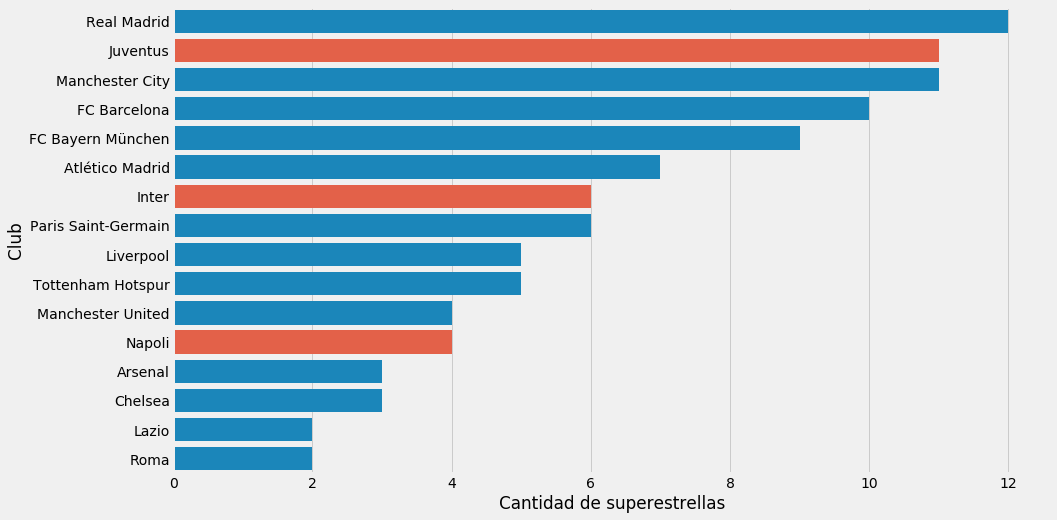

In [54]:
f, ax = plt.subplots(figsize=(14, 8))

sns.barplot(x="CountElite", y="Club", data=df_elite, hue="Top3", dodge=False)

ax.get_legend().remove()
ax.set(ylabel="Club", xlabel="Cantidad de superestrellas")



### Equipos letales

¿Cómo se determinan los equipos más ofensivos?
El método utilizado en este análisis toma una calificación promedio de los cuatro atributos principales relacionados con los goles - Definición (Finishing), Tiros de lejos (LongShots), Penales (Penalties), Potencia de pegada (ShotPower) y Posicionamiento (Positioning). Los atributos se suman y se calcula un promedio. Para determinar los equipos con el mayor índice de ataque, sólo se consideran los mediocampistas y los delanteros.

A continuación se muestra la puntuación ofensiva de los equipos más peligrosos para realizar goles. El Inter (12 mediocampistas y delanteros) y la Juventus (13 mediocampistas y delanteros) son los equipos más peligrosos por delante del arco, claramente por delante del tercer club más peligroso, el Nápoles (13 mediocampistas y delanteros). Curiosamente, hay algunas ligas que están representadas en los 20 equipos más peligrosos ofensivamente - la liga Portuguesa, la Turca, y la Griega, además de las habituales de Inglaterra, Italia, Alemania, España y Francia.



In [55]:
df_attack = df[df['Position Group'].isin(['MID', 'FWD'])]
df_attack['AttackingRating'] = ((df_attack['Finishing']+df_attack['LongShots']+df_attack['Penalties']+df_attack['ShotPower']+df_attack['Positioning'])/5)

df_attack = df_attack.groupby('Club').agg(['count','mean'])[['AttackingRating']]
df_attack.reset_index(level='Club', inplace=True)
df_attack.columns = df_attack.columns.droplevel(1)
df_attack.columns = ['Club','Cantidad de MID y FWD','Calificación ofensiva']
df_attack = df_attack.sort_values(by=['Calificación ofensiva'], ascending=False).head(20)
df_attack

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Club,Cantidad de MID y FWD,Calificación ofensiva
315,Inter,12,74.433333
326,Juventus,13,74.030769
398,Napoli,13,71.723077
375,Manchester United,19,71.505263
552,Sporting CP,17,71.152941
232,FC Porto,16,71.050000
212,FC Barcelona,18,71.033333
470,Real Madrid,17,71.011765
504,SL Benfica,16,70.875000
214,FC Bayern München,17,70.823529


### Salarios de equipo y relación calidad-precio
El Real Madrid y el Barcelona sorprenden a los demás equipos en lo que respecta a la masa salarial, con una masa salarial semanal de aproximadamente 5,5 millones de dólares. Manchester City es tercero lejano con un salario semanal de un poco más de 4 millones de dólares.

Sorprendentemente, el Inter de Milán, uno de los equipos más valorados en términos de talento general según análisis previos en este mismo trabajo, ocupa el puesto 16 de la lista: espectacular relación calidad-precio! Y lo que es más extraño, los equipos de la Premier League, el Everton y el West Ham, tienen salarios más altos que el Inter. Lo que es peor para estos dos clubes de la Premier League es que; el Milán, el Nápoles y el Inter, fueron tres de los cinco primeros clasificados en el juego. Como resultado, estos tres clubes tuvieron una gran relación calidad-precio, ya que cada punto de calificación general cuesta 22.000 dólares a Inter, frente a los 30.000 dólares de Everton. Por supuesto, los dos grandes españoles lo minimizan, ya que ambos gastan más de 65.000 dólares por punto de calificación general.

El gráfico muestra los 20 equipos que mas gastan en sueldos semanales, y cuanto les cuesta un punto de calificación general en su equipo. Los clubes españoles son gastadores, pero los italianos son astutos.

In [56]:
df_wage = df.groupby('Club').agg({'Overall':'mean','Wage':'sum'}).reset_index(level='Club')
df_wage.rename(columns={'Wage':'TotalWages', 'Overall': 'AverageRating'}, inplace=True)
df_wage['ValueForMoney'] = df_wage['TotalWages'] / df_wage['AverageRating']
df_wage = df_wage.sort_values(by=['TotalWages'], ascending=False).head(20)
df_wage['Top2'] = np.where(df_wage['Club'].isin(["Real Madrid", "FC Barcelona"]), '1', np.where(df_wage['Club'].isin(["Inter", "Milan", "Napoli"]), '2', '3'))
df_wage.reset_index(inplace = True, drop = True)


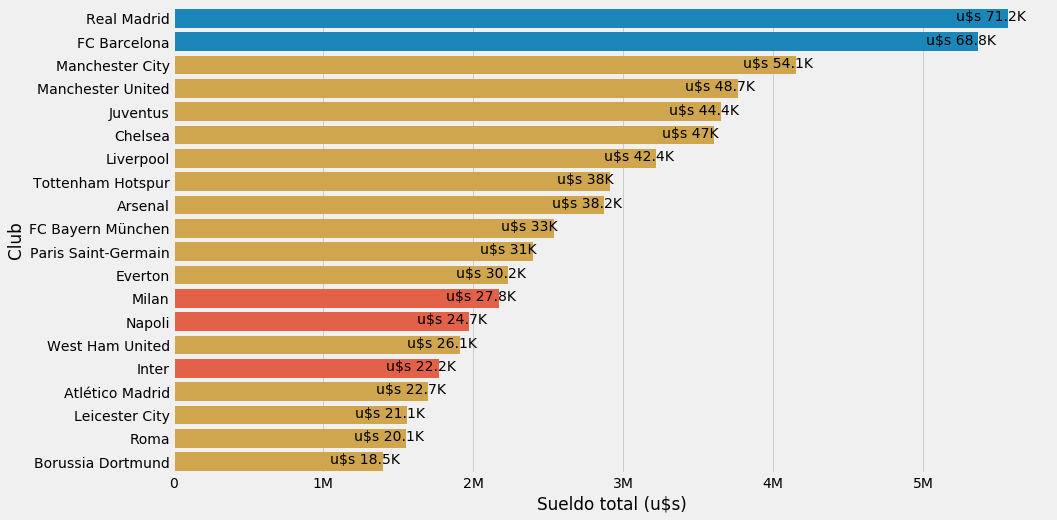

In [57]:
f, ax = plt.subplots(figsize=(14, 8))

sns.barplot(x="TotalWages", y="Club", data=df_wage, dodge=False, hue="Top2")

ax.get_legend().remove()
ax.set(ylabel="Club", xlabel="Sueldo total (u$s)")

for index, row in df_wage.iterrows():
    ax.annotate('u$s ' + human_format(row['ValueForMoney']), (row['TotalWages']-350000, index+0.1))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

#### Haciendo rendir el dinero
En el otro extremo, hay algunos clubes que son muy eficientes con sus gastos salariales. Los 2 clubes marcados con azul son aquellos que tienen una calificación general promedio superior a 70. El Spartak de Moscú y el PAOK griego son líderes, y cada punto de calificación general sólo les cuesta aproximadamente 400 dólares, ¡qué diferencia con el Real Madrid!

El gráfico muestra los 20 equipos que gastan menos por cada punto de calificación general.

In [58]:
df_wage_eficient = df.groupby('Club').agg({'Overall':'mean','Wage':'sum'}).reset_index(level='Club')
df_wage_eficient = df_wage_eficient[df_wage_eficient['Club'].notnull()]
df_wage_eficient.rename(columns={'Wage':'TotalWages', 'Overall': 'AverageRating'}, inplace=True)
df_wage_eficient['ValueForMoney'] = df_wage_eficient['TotalWages'] / df_wage_eficient['AverageRating']
df_wage_eficient = df_wage_eficient.sort_values(by=['TotalWages'], ascending=False).tail(25)
df_wage_eficient['LessThan70'] = df_wage_eficient['AverageRating'] < 70
df_wage_eficient = df_wage_eficient.sort_values(by='TotalWages', ascending=True)
df_wage_eficient.reset_index(inplace = True, drop = True)
df_wage_eficient


,Club,AverageRating,TotalWages,ValueForMoney,LessThan70
0,Sligo Rovers,56.631579,21090,372.407063,True
1,Limerick FC,54.526316,21090,386.785714,True
2,Derry City,55.777778,21090,378.107570,True
3,Dalkurd FF,59.761905,24420,408.621514,True
4,Shamrock Rovers,60.090909,24420,406.384266,True
5,St. Patrick's Athletic,57.782609,25530,441.828442,True
6,Bray Wanderers,53.652174,25530,475.842788,True
7,Viktoria Plzeň,69.416667,26640,383.769508,True
8,Cork City,58.360000,27750,475.496916,True
9,Bohemian FC,55.000000,27750,504.545455,True


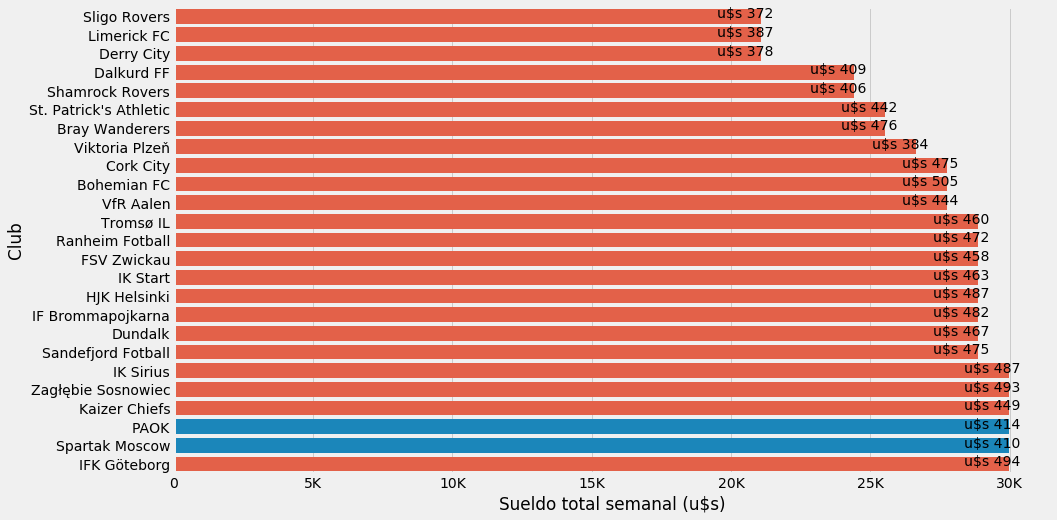

In [59]:
f, ax = plt.subplots(figsize=(14, 8))

sns.barplot(x="TotalWages", y="Club", data=df_wage_eficient, hue="LessThan70", dodge=False)

ax.get_legend().remove()
ax.set(ylabel="Club", xlabel="Sueldo total semanal (u$s)")

for index, row in df_wage_eficient.iterrows():
    ax.annotate('u$s ' + human_format(row['ValueForMoney']), (row['TotalWages']-1600, index+0.1))

    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

# K-Means Clustering

Intentar encontrar jugadores similares puede ser una tarea muy difícil. Hay cerca de 100 variables que puede ser necesario analizar para determinar la "similitud" entre los jugadores. Si a eso le sumamos la comparación de varios jugadores, es casi imposible.

K-means clustering tiene por objeto separar las observaciones en k clusters en los que cada observación pertenece al cluster con el que tiene la media más cercana, sirviendo como prototipo del cluster. Resultando en un particionamiento del espacio de datos en celdas de Voronoi.

Los pasos utilizados se describen a continuación:

-Filtrar a los arqueros.

-Seleccionar sólo variables numéricas, principalmente las variables de atributo. La valuación de los jugadores, los salarios y la calificación general se han omitido de los datos para que estas variables no influyan en nuestras agrupaciones, permitiendo que los clústeres contengan jugadores similares en función de sus habilidades.

-Escalar los datos - sin escalar, algunas variables, especialmente Especial (Special), sesgarian las agrupaciones hacia esa variable.

-Ejecutar K-Means en un bucle (2 a 15 iteraciones) para encontrar el número óptimo (k). Esto se puede apreciar visualmente, a traves de la tecnica del codo (elbow), cuando el grafico se 'tuerce'.

-Ajustar el número de centros (8)

-Volver a ejecutar el modelo con K = 8

-Asignar el grupo de cluster de nuevo a los datos principales.

In [60]:
kmeans_not_wanted_cols = [
    #int64
    'Overall', 'Value', 'Wage', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
    
    #float64
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
]


data_cluster = df[df['Position'] != 'GK']
data_cluster['RoomToGrow'] = (data_cluster['Potential'] - data_cluster['Overall'])

data_cluster = data_cluster.select_dtypes(include='number')

data_cluster = data_cluster.loc[:, list(map(lambda x: x not in kmeans_not_wanted_cols, list(data_cluster.columns)))]


data_cluster.head()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Age,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,RoomToGrow
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,31,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,0
20801,33,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,0
190871,26,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,1
192985,27,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,1
183277,27,91,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,0


In [61]:
data_cluster.shape

(16182, 32)

In [67]:
#data_cluster.dropna().shape
data_cluster = data_cluster.dropna()

In [68]:
from sklearn.preprocessing import scale

data_cluster_scaled = scale(data_cluster)
data_cluster_scaled

array([[ 1.3177375 ,  3.70093228,  2.10924951, ..., -1.24694165,
        -1.23222809, -0.93245343],
       [ 1.75749212,  3.70093228,  2.10924951, ..., -1.09048443,
        -1.38869319, -0.93245343],
       [ 0.21835095,  3.53637387,  1.75550368, ..., -1.45555129,
        -0.86714287, -0.74793216],
       ...,
       [-1.98042215, -0.74214476, -2.06495126, ..., -2.02922778,
        -2.01455357,  2.75797197],
       [-1.76054484, -0.90670317, -0.72071711, ..., -1.40339888,
        -1.18007306,  2.5734507 ],
       [-1.98042215, -0.90670317, -0.93296461, ..., -0.46465553,
         0.01949268,  2.75797197]])

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sse = []
sil_coeff = []
kas = range(2, 15)
for k in kas:
#    kmeans_result = KMeans(n_clusters=k, max_iter=1000).fit(data_cluster_scaled)
    kmeans_result = KMeans(n_clusters=k, max_iter=300).fit(data_cluster_scaled)
    labels = kmeans_result.labels_
    sse.append(kmeans_result.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
    sil_coeff.append(silhouette_score(data_cluster_scaled, labels, metric='euclidean'))

Text(9, 300000, 'K óptimo = 8')

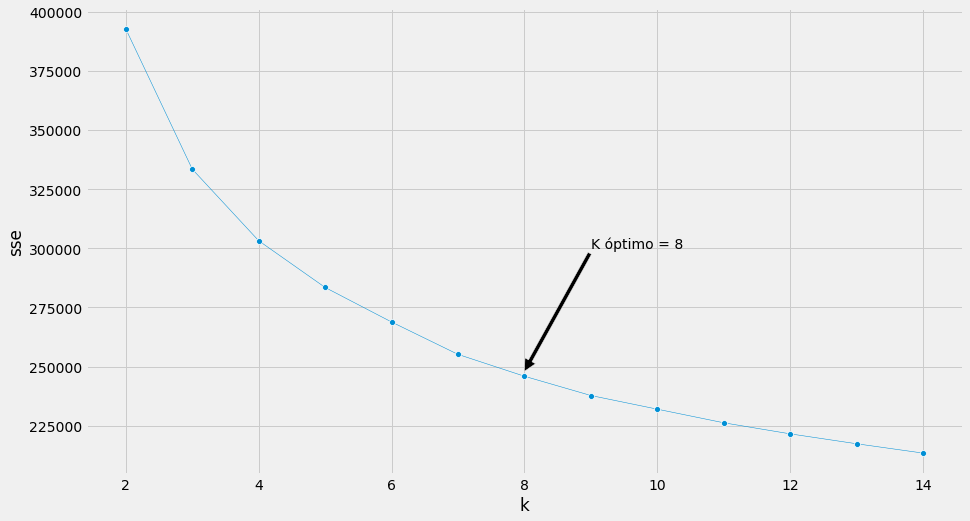

In [70]:
f, ax = plt.subplots(figsize=(14, 8))
#plt.plot(list(sse.keys()), list(sse.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")

df_kmeans_result = pd.DataFrame(zip(kas, sse, sil_coeff), columns =['k', 'sse', 'sil']) 

g = sns.lineplot(x="k", y="sse", marker="o", data=df_kmeans_result)
plt.setp(g.lines,linewidth=0.5)

ax.annotate('K óptimo = 8', xy=(8, 248000), xytext=(9, 300000), arrowprops=dict(facecolor='black'))

In [71]:
k8_result = KMeans(n_clusters=8, max_iter=300).fit(data_cluster_scaled)
data_k8 = df[df['Position'] != 'GK']
data_k8 = data_k8.dropna()
data_k8.shape

(14751, 57)

In [72]:
data_cluster['cluster label'] = k8_result.labels_

In [73]:
data_cluster.head()

,Age,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,RoomToGrow,cluster label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,31,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,0,4
20801,33,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,0,4
190871,26,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,1,4
192985,27,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,1,4
183277,27,91,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,0,4


In [74]:
data_cluster[['cluster label']].head()

,cluster label
ID,
158023,4
20801,4
190871,4
192985,4
183277,4


In [75]:
df_labeled = df.loc[data_cluster.index].copy()

In [76]:
df_labeled.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,122655000,627150,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,251415000,FWD,31 to 35
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,85470000,449550,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,141081000,FWD,31 to 35
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,131535000,321900,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,253191000,FWD,26 to 30
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,113220000,394050,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,218004000,MID,26 to 30
183277,E. Hazard,27,Belgium,91,91,Chelsea,103230000,377400,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,191031000,FWD,26 to 30


In [77]:
df_labeled['cluster label'] = data_cluster['cluster label']

K-means particionó la data en los 8 clusteres como se muestra mas abajo.

Parece ser que los clusters 6 y 7 representan a los de tipo defensivos-mediocampistas (compuesto principalmente por Defensores y Mediocampistas). El Cluster 0 parece estar agrupando a mediocampistas de mentalidad muy ofensiva (compuesto principalmente por mediocampistas y delanteros).

El cluster 4 agrupa a los mediocampistas, el cluster 3 a los delanteros, mientras que los clusters 2 y 5 a los defensores.

In [78]:
pd.crosstab(df_labeled['cluster label'], df_labeled['Position Group'])

Position Group,DEF,FWD,MID
cluster label,,,
0,26,624,1546
1,1182,30,1673
2,1629,3,170
3,1404,6,141
4,75,425,948
5,1,1359,148
6,21,936,902
7,1528,35,1310


Graficar a los 20 jugadores mejor valorados de cada grupo nos muestra qué jugadores son similares en términos de sus habilidades.

In [79]:
top20_cluster_indexes = df_labeled.groupby('cluster label')['Overall'].nlargest(20).reset_index()['ID'].tolist()


In [80]:
df_labeled_top20 = df_labeled[df_labeled.index.isin(top20_cluster_indexes)]
df_labeled_top20

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Group,Age Group,cluster label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,122655000,627150,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,251415000,FWD,31 to 35,4
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,85470000,449550,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,141081000,FWD,31 to 35,4
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,131535000,321900,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,253191000,FWD,26 to 30,4
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,113220000,394050,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,218004000,MID,26 to 30,4
183277,E. Hazard,27,Belgium,91,91,Chelsea,103230000,377400,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,191031000,FWD,26 to 30,4
177003,L. Modrić,32,Croatia,91,91,Real Madrid,74370000,466200,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",5'8,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,152514000,MID,31 to 35,4
176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,88800000,505050,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,"Jul 11, 2014",6'0,190lbs,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,182040000,FWD,31 to 35,4
155862,Sergio Ramos,32,Spain,91,91,Real Madrid,56610000,421800,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",6'0,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,116106000,DEF,31 to 35,1
188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,85470000,227550,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,ST,9.0,"Jul 1, 2014",6'0,176lbs,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,141081000,FWD,26 to 30,4


In [81]:
pd.crosstab(df_labeled_top20['cluster label'], df_labeled_top20['Position Group'])

Position Group,DEF,FWD,MID
cluster label,,,
0,0,4,16
1,17,0,3
2,20,0,0
3,20,0,0
4,0,12,8
5,0,20,0
6,0,16,4
7,17,0,3


In [82]:
df_labeled_top20['Under27'] = np.where(df_labeled_top20['Age'] < 26, "<= 25", ">= 26")


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


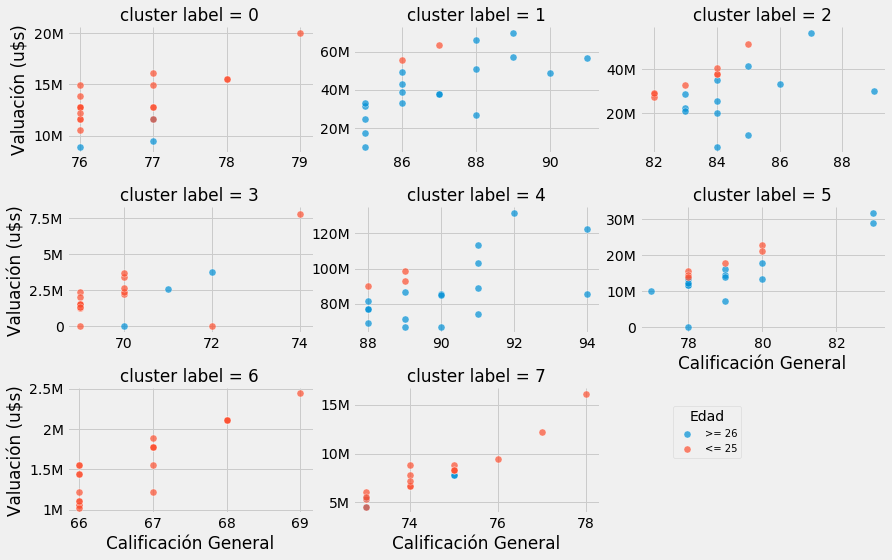

In [83]:
g = sns.FacetGrid(df_labeled_top20, col="cluster label", sharex=False, sharey=False, col_wrap=3, hue="Under27")
g.fig.set_size_inches(w=13, h=8)

g.map(plt.scatter, "Overall", "Value", s=50, alpha=.7, linewidth=.5, edgecolor="white")
#g.add_legend()


for ax2 in g.axes:
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
    
g.set_axis_labels("Calificación General", "Valuación (u$s)")

plt.legend(title='Edad', bbox_to_anchor=(1.6, 0.4), loc='lower right', fontsize=10)

#g.fig.tight_layout()


TODO: ANALIS TIROS LIBRES, TEST ESTADISTICO ZURDOS VS DERECHOS

In [139]:
zurdos = df[(df['Preferred Foot'] == 'Left') & (df["Position Group"] != 'GK')][['Overall', 'FKAccuracy']].reset_index(drop=True)
derechos = df[(df['Preferred Foot'] == 'Right') & (df["Position Group"] != 'GK')][['Overall', 'FKAccuracy']].reset_index(drop=True)


ambos =  df[df["Position Group"] != 'GK'][['Overall', 'FKAccuracy', 'Preferred Foot']].reset_index(drop=True)




In [131]:
zurdos.describe()


,Overall,FKAccuracy
count,4005.000000,4005.000000
mean,66.825968,49.369538
std,6.481506,15.886343
min,47.000000,12.000000
25%,63.000000,36.000000
50%,67.000000,48.000000
75%,71.000000,63.000000
max,94.000000,94.000000


In [132]:
derechos.describe()

,Overall,FKAccuracy
count,12129.000000,12129.000000
mean,66.334570,45.456097
std,6.893055,14.664922
min,46.000000,10.000000
25%,62.000000,34.000000
50%,66.000000,43.000000
75%,71.000000,57.000000
max,94.000000,93.000000


In [138]:
ambos.describe()

,Overall,FKAccuracy
count,16182.000000,16134.000000
mean,66.443332,46.427544
std,6.790578,15.072031
min,46.000000,10.000000
25%,62.000000,34.000000
50%,66.000000,44.000000
75%,71.000000,58.000000
max,94.000000,94.000000


In [133]:
zurdos.FKAccuracy.values

array([94., 77., 88., ..., 21., 25., 27.])

In [152]:
from scipy import stats

test_result = stats.ttest_ind(zurdos.Overall, derechos.Overall, equal_var = False)

In [153]:
test_result

Ttest_indResult(statistic=4.09401659673668, pvalue=4.285879949958742e-05)

In [154]:
print('%.10f' % test_result.pvalue)

0.0000428588


In [157]:
from scipy import stats

test_result_fk = stats.ttest_ind(zurdos.FKAccuracy, derechos.FKAccuracy, equal_var = False)
test_result_fk

Ttest_indResult(statistic=13.772018707755382, pvalue=1.5096545819229494e-42)

In [159]:
print('%.16f' % test_result_fk.pvalue)

0.0000000000000000


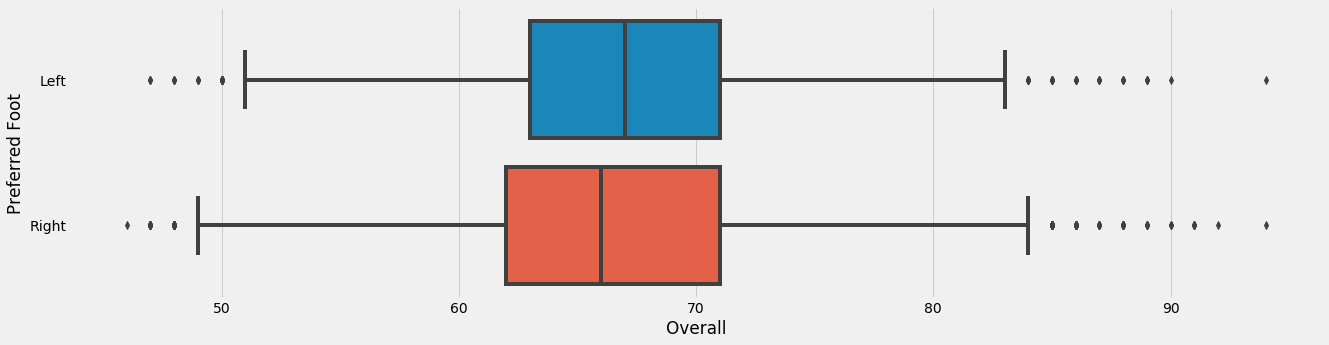

In [147]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Overall', y='Preferred Foot', data=ambos)

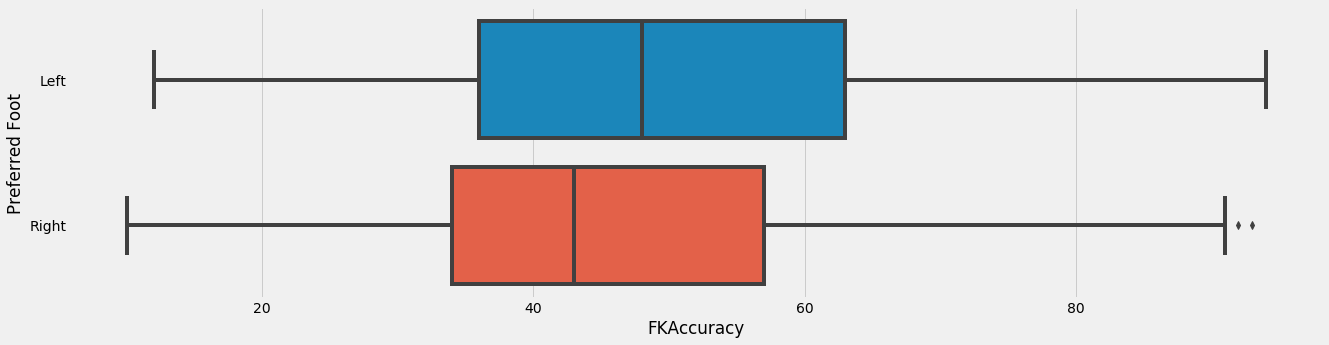

In [155]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='FKAccuracy', y='Preferred Foot', data=ambos)

salario